In [ ]:
%cd /content/drive/MyDrive/project-4

/content/drive/MyDrive/project-4


In [ ]:
import tensorflow as tf
from helper_functions import create_tensorboard_callback, plot_loss_curves, walk_through_dir

In [ ]:
train_dir = "Train"
test_dir = "Test"

In [ ]:
IMG_SIZE = (50, 50) 
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", 
                                                                            batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 37185 files belonging to 40 classes.
Found 400 files belonging to 40 classes.


In [ ]:
# base_model = tf.keras.applications.EfficientNetB0(include_top=False)
# base_model.trainable = False
# inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
# x = base_model(inputs)
# print(f"Shape after base_model: {x.shape}")

# x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
# print(f"After GlobalAveragePooling2D(): {x.shape}")

# outputs = tf.keras.layers.Dense(40, activation="softmax", name="output_layer")(x)

# model_efficient_net = tf.keras.Model(inputs, outputs)

# model_efficient_net.compile(loss='categorical_crossentropy',
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])



16719872/16705208 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True
for layer in base_model.layers[:-7]:
  layer.trainable = False
inputs = tf.keras.layers.Input(shape=(50, 50, 3), name="input_layer")
x = base_model(inputs, training=False)  
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(40, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# for layer_number, layer in enumerate(base_model.layers):
#   print(layer_number, layer.name, layer.trainable)

In [ ]:
history_efficient_model = model_2.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 validation_steps=len(test_data))

Epoch 1/5
1163/1163 [==============================] - 8852s 8s/step - loss: 0.8319 - accuracy: 0.7252 - val_loss: 0.5873 - val_accuracy: 0.7975
Epoch 2/5
1163/1163 [==============================] - 135s 116ms/step - loss: 0.3423 - accuracy: 0.8812 - val_loss: 0.3653 - val_accuracy: 0.8925
Epoch 3/5
1163/1163 [==============================] - 135s 116ms/step - loss: 0.2208 - accuracy: 0.9243 - val_loss: 0.2923 - val_accuracy: 0.9175
Epoch 4/5
1163/1163 [==============================] - 135s 116ms/step - loss: 0.1601 - accuracy: 0.9441 - val_loss: 0.2011 - val_accuracy: 0.9475
Epoch 5/5
1163/1163 [==============================] - 135s 116ms/step - loss: 0.1369 - accuracy: 0.9544 - val_loss: 0.2439 - val_accuracy: 0.9400


In [ ]:
model_2.save("models/model_efficient_net_less_data.h5")

In [ ]:
%cd /content/drive/MyDrive/project-4

/content/drive/MyDrive/project-4


In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('models/model_efficient_net_less_data.h5')

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 50, 50, 3)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 40)                51240     
                                                                 
Total params: 4,100,811
Trainable params: 889,128
Non-trainable params: 3,211,683
_________________________________________________________________


In [ ]:
from helper_functions import load_and_prep_image,pred_and_plot
import tensorflow as tf

In [ ]:
def load_and_prep_image(filename, img_shape=50):
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])
  img/=255.
  return img

In [ ]:
from matplotlib import pyplot as plt
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  # predicted class
  pred_class = class_names[pred.argmax()] # if more than one output, take the max

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

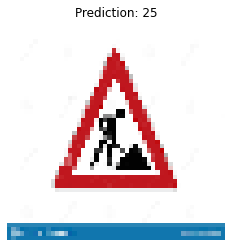

In [ ]:
pred_and_plot(new_model,'construction_site.png',[i for i in range(40)])